In [281]:
import random

POPULATION_SIZE = 10
NB_GENES = 6
MUTATION_RATE = 0.01
CROSSING_RATE = 0.6

Chromosome = list
Population = [None] * POPULATION_SIZE

# Fonction pour permuter deux éléments dans un tableau
def permuter(chromosome: Chromosome, i: int, j: int):
    chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

# Fonction pour générer un entier aléatoire entre min et max (inclus)
def randomInt(min: int, max: int) -> int:
    return random.randint(min, max)

# Initialiser Population
def initialiser_population() -> Population:
    population = [None] * POPULATION_SIZE  # Population de taille fixe

    for i in range(POPULATION_SIZE):
        chromosome = [1]  # Le premier gène est toujours la ville de départ (ville 1)

        # Initialiser les villes restantes
        entiers = list(range(2, NB_GENES + 1))  # Génère [2, 3, ..., NB_GENES]
        N = len(entiers)

        # Générer les gènes restants en permutant
        for _ in range(1, NB_GENES):
            index = randomInt(0, N - 1)  # Index basé sur 0 pour Python
            chromosome.append(entiers[index])
            permuter(entiers, index, N - 1)  # Échanger avec la dernière position disponible
            N -= 1  # Réduire la taille de la liste disponible

        # Ajouter le chromosome à la population
        population[i] = chromosome

    return population

# Exemple d'utilisation
if __name__ == "__main__":
    population = initialiser_population()
    for i, chromosome in enumerate(population):
        print(f"Chromosome {i + 1}: {chromosome}")



Chromosome 1: [1, 2, 4, 5, 6, 3]
Chromosome 2: [1, 2, 6, 4, 5, 3]
Chromosome 3: [1, 6, 2, 3, 5, 4]
Chromosome 4: [1, 6, 4, 2, 3, 5]
Chromosome 5: [1, 6, 4, 5, 3, 2]
Chromosome 6: [1, 5, 2, 3, 6, 4]
Chromosome 7: [1, 3, 2, 4, 5, 6]
Chromosome 8: [1, 5, 4, 6, 2, 3]
Chromosome 9: [1, 4, 6, 5, 2, 3]
Chromosome 10: [1, 2, 3, 4, 6, 5]


In [282]:
# Initialisation de la matrice de distances (6x6)
matrice_distance = [
    [0, 4, 18, 20, 14, 6],
    [4, 0, 12, 8, 10, 16],
    [18, 12, 0, 6, 4, 14],
    [20, 8, 6, 0, 16, 10],
    [14, 10, 4, 16, 0, 12],
    [6, 16, 14, 10, 12, 0]
]


# Exemple d'utilisation
ville_depart = 1  # Ville 1
ville_arrivee = 6  # Ville 6

# La distance entre la ville 1 et la ville 6
distance = matrice_distance[ville_depart - 1][ville_arrivee - 1]
print(f"La distance entre la ville {ville_depart} et la ville {ville_arrivee} est : {distance}")


La distance entre la ville 1 et la ville 6 est : 6


In [283]:
def fitness(chromosome, matrice_distance):
    distance = 0

    # Calculer la distance totale en parcourant les villes dans le chromosome
    for i in range(NB_GENES - 1):
        distance += matrice_distance[chromosome[i] - 1][chromosome[i + 1] - 1]

    # Ajouter la distance pour revenir à la ville de départ
    distance += matrice_distance[chromosome[-1] - 1][chromosome[0] - 1]
    return distance


In [284]:
#tester fitnesse d'un chromosome
chromosome = [1, 4,5,6,2,3]
resultat_fitness = fitness(chromosome, matrice_distance)
print(f"Fitness du chromosome : {resultat_fitness:.4f} km")


Fitness du chromosome : 94.0000 km


In [285]:
#tester fitnesse d'un chromosome
chromosome= [1,2,4,3,5,6]

# Calcul de la fitness pour ce chromosome
resultat_fitness_2 = fitness(chromosome_2, matrice_distance)
print(f"Fitness du chromosome : {resultat_fitness_2:.4f} km")


Fitness du chromosome : 40.0000 km


In [286]:
import random

def selection_roulette(population):
    # Calcul de la fitness totale
    fitness_total = 0
    for chromosome in population:
        fitness_total += fitness(chromosome, matrice_distance)

    # Tirage aléatoire entre 0 et la fitness totale
    tirage_aleatoire = random.uniform(0, fitness_total)

    fitness_partielle = 0

    # Sélectionner un chromosome en fonction de la roulette
    for chromosome in population:
        fitness_partielle += fitness(chromosome, matrice_distance)
        if fitness_partielle >= tirage_aleatoire:
            return chromosome

    # Dernier recours, si aucun chromosome n'est sélectionné
    return population[-1]


In [287]:
# tester Sélection d'un chromosome par la méthode de la roulette
selected_chromosome = selection_roulette(population)

print(f"Chromosome sélectionné : {selected_chromosome}")
resultat_fitness = fitness(selected_chromosome, matrice_distance)
print(f"Fitness du chromosome : {resultat_fitness:.4f} km")


Chromosome sélectionné : [1, 3, 2, 4, 5, 6]
Fitness du chromosome : 72.0000 km


In [288]:
def corriger(child):
    manquants = []  # Liste des villes manquantes
    compteur = [0] * (NB_GENES + 1)  # Tableau pour compter les occurrences de chaque ville

    # Compter les occurrences de chaque ville dans le chromosome
    for i in range(NB_GENES):
        index = child[i]
        compteur[index] += 1

    # Trouver les villes manquantes
    for j in range(1, NB_GENES + 1):
        if compteur[j] == 0:
            manquants.append(j)

    # Corriger les villes en double dans le chromosome
    indice_manquants = 0
    for i in range(NB_GENES):
        index = child[i]
        if compteur[index] > 1:
            # Remplacer la ville en double par une ville manquante
            child[i] = manquants[indice_manquants]
            compteur[index] -= 1
            compteur[manquants[indice_manquants]] += 1
            indice_manquants += 1

    return child

In [289]:
def crossover(parent1, parent2):
    # Création des enfants
    child1 = [0] * NB_GENES
    child2 = [0] * NB_GENES

    # Vérifier si le croisement doit avoir lieu
    if random.random() < CROSSING_RATE:
        # Point de croisement aléatoire
        crossover_point = random.randint(2, NB_GENES - 1)

        for i in range(NB_GENES):
            if i < crossover_point:
                child1[i] = parent1[i]
                child2[i] = parent2[i]
            else:
                child1[i] = parent2[i]
                child2[i] = parent1[i]


        child1=corriger(child1)
        child2=corriger(child2)
        return (child1, child2)
    else:
        return (parent1, parent2)


In [291]:
# tester le croissement
parent1 = [1, 4, 2, 6, 5, 3]
parent2 = [1, 2, 6, 5, 3, 4]

child1, child2 = crossover(parent1, parent2)

print("Enfant 1:", child1)
print("Enfant 2:", child2)



Enfant 1: [1, 4, 2, 6, 5, 3]
Enfant 2: [1, 2, 6, 5, 3, 4]


In [292]:
def mutate_permutation(parent):
    child = parent.copy()  # Créer un enfant en copiant le parent

    # Vérifier si une mutation doit avoir lieu
    if random.random() < MUTATION_RATE:
        # Choisir deux points de mutation distincts, mais éviter l'indice 0
        mutationPoint1 = random.randint(1, NB_GENES - 1)
        mutationPoint2 = random.randint(1, NB_GENES - 1)

        # Assurer que les points sont différents
        while mutationPoint1 == mutationPoint2:
            mutationPoint2 = random.randint(1, NB_GENES - 1)

        # Permuter les éléments aux deux points de mutation
        child[mutationPoint1], child[mutationPoint2] = child[mutationPoint2], child[mutationPoint1]

    return child

In [293]:
#tester permutation
parent = [1, 4, 2, 6, 5, 3]
child= mutate_permutation(parent)

print("Enfant :", child)

Enfant : [1, 4, 2, 6, 5, 3]


In [294]:
def trier_par_fitness(population, matrice_distance):
    return sorted(population, key=lambda chromo: fitness(chromo, matrice_distance))

In [295]:
# Remplacement de la population par les meilleurs chromosomes
def garder_meilleurs(population_actuelle, nouvelle_population):
    # Combiner la population actuelle et la nouvelle population
    population_totale = population_actuelle + nouvelle_population

    # Trier la population combinée par fitness croissante
    population_totale = trier_par_fitness(population_totale, matrice_distance)

    # Garder seulement les meilleurs chromosomes
    population_finale = population_totale[:POPULATION_SIZE]

    return population_finale


In [302]:
import matplotlib.pyplot as plt

def afficher_courbe_fitness(meilleures_fitness):
    plt.plot(meilleures_fitness)
    plt.xlabel('Itération')
    plt.ylabel('Meilleure Fitness')
    plt.title('Évolution de la meilleure fitness au cours des itérations')

    # Générer les graduations des axes
    xticks = list(range(len(meilleures_fitness)))
    plt.xticks(xticks)

    plt.show()

In [329]:
# Algorithme génétique
def algorithme_genetique():
    population = initialiser_population()
    iteration = 0
    nb_max_iteration_atteint = False
    nb_max_iteration = 20
    nouvelle_population = []  # Initialization
    # Liste pour stocker la meilleure fitness à chaque itération
    meilleures_fitness = []
    meilleure_fitness_iter = max(fitness(individu, matrice_distance) for individu in population)
    meilleures_fitness.append(meilleure_fitness_iter)

    while not nb_max_iteration_atteint:

        iteration += 1
        if iteration == nb_max_iteration:
            nb_max_iteration_atteint = True

        for i in range(POPULATION_SIZE // 2):
            parent1 = selection_roulette(population)
            parent2 = selection_roulette(population)
            enfant1, enfant2 = crossover(parent1, parent2)
            enfant1 = mutate_permutation(enfant1)
            enfant2 = mutate_permutation(enfant2)
            nouvelle_population.extend([enfant1, enfant2]) # Append enfants


        # Remplacement de la population par les meilleurs chromosomes
        population = garder_meilleurs(population, nouvelle_population)
        nouvelle_population = [] # Reset pour next generation
        # Calculer la meilleure fitness de la population actuelle
        meilleure_fitness_iter = min(fitness(individu, matrice_distance) for individu in population)
        meilleures_fitness.append(meilleure_fitness_iter)

    # Trouver le meilleur chromosome
    meilleur_chromosome = population[0]
    for i in range(1, POPULATION_SIZE):
        if fitness(population[i], matrice_distance) < fitness(meilleur_chromosome, matrice_distance):
            meilleur_chromosome = population[i]

    # Appel à la fonction pour afficher la courbe
    afficher_courbe_fitness(meilleures_fitness)
    return meilleur_chromosome


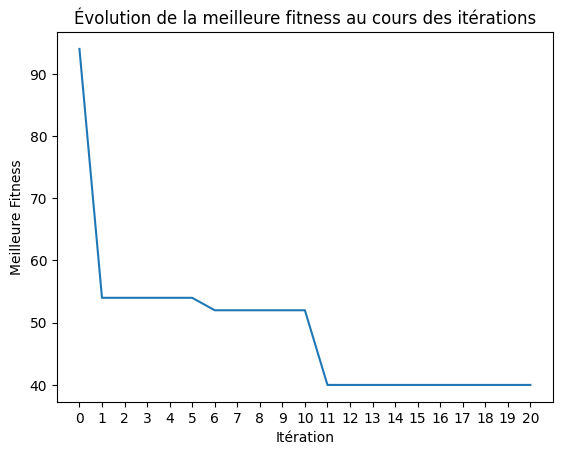

meilleur Chromosome  : [1, 6, 4, 3, 5, 2]
Fitness du chromosome : 40.0000 km


In [327]:
best_chromosome = algorithme_genetique()

print(f"meilleur Chromosome  : {best_chromosome}")

resultat_fitness = fitness(best_chromosome, matrice_distance)
print(f"Fitness du chromosome : {resultat_fitness:.4f} km")